In [1]:
!gdown 1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h

Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/title_brand.csv
100% 97.3M/97.3M [00:02<00:00, 42.7MB/s]


In [2]:
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW

Downloading...
From: https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
To: /content/train_data.csv
100% 635M/635M [00:11<00:00, 53.6MB/s]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from PIL import Image
from collections import defaultdict
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train_data.csv").drop(
    ["reviewTime", "unixReviewTime"], axis=1
)
extra = pd.read_csv("title_brand.csv")

In [3]:
data["feeling"] = data["overall"].apply(
    lambda x: 1 if x in [4, 5] else -1 if x in [1, 2] else 0
)
data

overall vote  verified      reviewerID        asin style  \
0             2  NaN     False   A2OSUEZJIN7BI  0511189877   NaN   
1             5  NaN      True  A2NETQRG6JHIG7  0511189877   NaN   
2             4  NaN      True  A12JHGROAX49G7  0511189877   NaN   
3             5  NaN      True  A1KV65E2TMMG6F  0511189877   NaN   
4             5  NaN      True  A280POPEWI0NSA  0594459451   NaN   
...         ...  ...       ...             ...         ...   ...   
838939        5  NaN      True  A1OOVLE2KZ6KGA  B01HJCN1EI   NaN   
838940        1  NaN      True   A77K1B31UAQ29  B01HJCN1EI   NaN   
838941        3  NaN      True  A2SVXUVUAWUDK2  B01HJH42KU   NaN   
838942        5  2.0      True  A2HUZO7MQAY5I2  B01HJH40WU   NaN   
838943        5  NaN      True  A1FGCIRPRNZWD5  B01HJF704M   NaN   

             reviewerName                                         reviewText  \
0                   Chris  I have an older URC-WR7 remote and thought thi...   
1            Qrysta White  First time I've EVER had a remote that needed ...   
2                 Linwood  Got them and only 2 of them worked. company ca...   
3           Dane Williams  I got tired of the remote being on the wrong s...   
4             Kristina H.  After purchasing cheap cords from another webs...   
...                   ...                                                ...   
838939            Puddzee  These are my favorite charging cords for a few...   
838940  addictedtoreading  Update....after 2 months of gentle use, cable ...   
838941             Andrew  These are okay. The connection becomes very if...   
838942     michael clontz  Ok here is an odd thing that happened to me, I...   
838943             Brando  I have it plugged into a usb extension on my g...   

                                                  summary  feeling  
0                                            Cannot Learn       -1  
1                     zero programming needed!  Miracle!?        1  
2                           Works Good and programs easy.        1  
3                                      Same as TWC remote        1  
4                                       Good Quality Cord        1  
...                                                   ...      ...  
838939                                   Worth the price.        1  
838940                  UPDATE...BREAKS AND SLOW CHARGING       -1  
838941  Hope this makes sense. You'd understand if you...        0  
838942     Not the correct product as linked in the sale.        1  
838943                                Works well enough..        1  

[838944 rows x 10 columns]

<h3>1. Distribution of overall</h6>

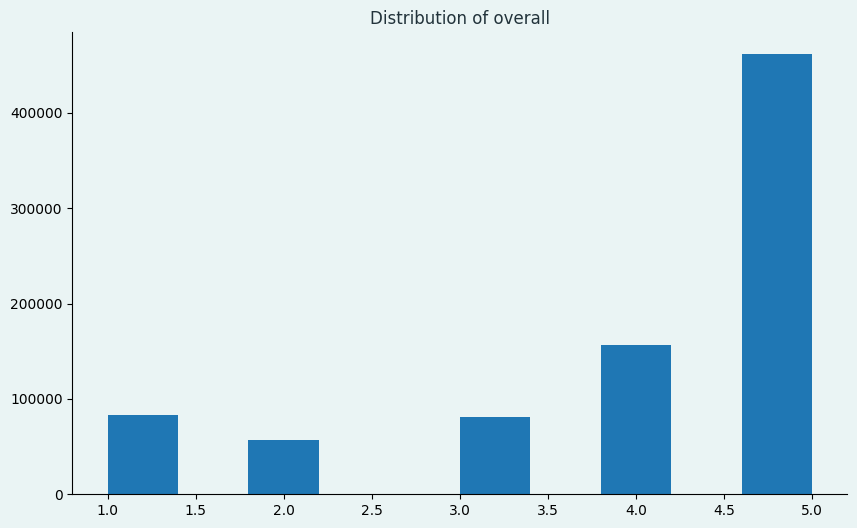

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(data["overall"])
ax.set_title("Distribution of overall", color="#22333b", fontsize=12)
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

As we can see, the dataset is **not balanced**, for example, half of our data has an overall rating of 5. If the data used for modeling is not balanced, our model will be **biased**, which is undesirable. Therefore, for modeling, we need to select an approximately **equal** number of data from each category. This task is not performed in this section and will be done during modeling.

<h3>2. Word Clouds</h6>

Here, we first tokenize the reviews in each category and count the occurrences of each word. Then, we draw a word cloud based on the frequency of the words.

In [10]:
nlp = spacy.load("en_core_web_sm")


def process_text(text):
    doc = nlp(text)
    tokens = [
        token.text.lower() for token in doc if not token.is_stop and token.is_alpha
    ]
    return tokens


words_to_remove = [
    "use",
    "phone",
    "cable",
    "camera",
    "usb",
    "tv",
    "laptop",
    "speaker",
    "screen",
    "charger",
    "mouse",
    "plug",
    "ipad",
    "adapter",
    "bluetooth",
    "computer",
    "drive",
    "keyboard",
    "wireless",
    "headphones",
]

<h5>Tokenizing the reviews and counting the frequency of words</h5>

In [7]:
word_freq_bad = defaultdict(int)

df_bad = data[data["feeling"] == -1]
batch_size = 100
num_batches = len(df_bad) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_bad["reviewText"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(text) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_bad[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_bad["reviewText"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]
for tokens in remaining_tokens:
    for token in tokens:
        word_freq_bad[token] += 1

freq_bad = pd.DataFrame(list(word_freq_bad.items()), columns=["Word", "Frequency"])
freq_bad.to_csv("freq_bad.csv")

100%|██████████| 1397/1397 [53:12<00:00,  2.28s/it]


<h5>Word Cloud of reviews with overall rating 1 & 2</h5>



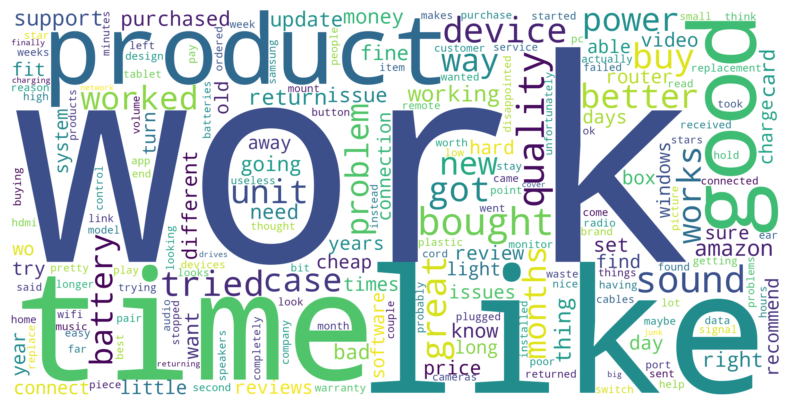

In [25]:
mask = np.array(Image.open("min.jpg"))

for word in words_to_remove:
    if word in word_freq_bad:
        del word_freq_bad[word]
wordcloud_bad_shape = WordCloud(
    width=2400, height=2400, background_color="white", mask=mask, colormap="viridis"
).generate_from_frequencies(word_freq_bad)
wordcloud_bad = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_bad)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bad, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_bad_shape.to_file("min_shape_output2.png")
wordcloud_bad.to_file("min_output2.png")

In the word cloud of **negative reviews**, positive words such as **"good"** and **"great"** may have been used along with a **negative verb**. The **same observation** can be made for words like **"work"** and **"like"** which also have a high frequency. Another frequently occurring word is **"time"** which could indicate dissatisfaction with the delivery time of the product. Additionally, there are other noticeable words that indicate dissatisfaction, such as **"disappointed", "problem", "issue", "unfortunately", "return" and ...**

<h5>Tokenizing the reviews and counting the frequency of words</h5>

In [12]:
word_freq_soso = defaultdict(int)

df_soso = data[data["feeling"] == 0]
batch_size = 100
num_batches = len(df_soso) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_soso["reviewText"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(text) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_soso[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_soso["reviewText"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]
for tokens in remaining_tokens:
    for token in tokens:
        word_freq_soso[token] += 1

freq_soso = pd.DataFrame(list(word_freq_soso.items()), columns=["Word", "Frequency"])
freq_soso.to_csv("freq_soso.csv")

100%|██████████| 812/812 [33:18<00:00,  2.46s/it]


<h5>Word Cloud of reviews with overall rating 3</h5>

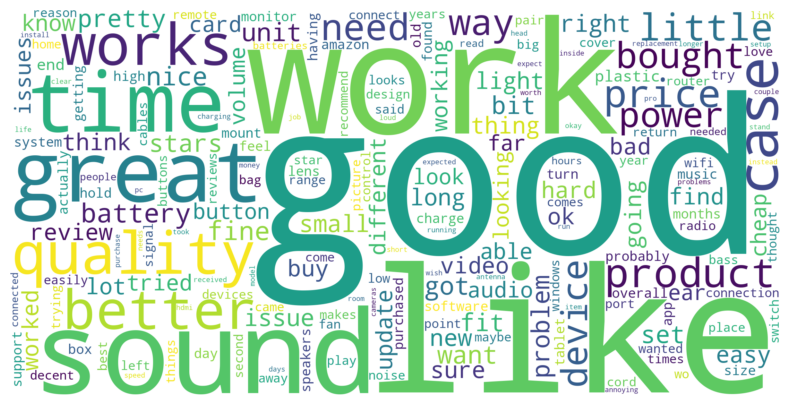

In [26]:
mask = np.array(Image.open("equal.jpg"))

for word in words_to_remove:
    if word in word_freq_soso:
        del word_freq_soso[word]
wordcloud_soso_shape = WordCloud(
    width=2400, height=2400, background_color="white", mask=mask, colormap="viridis"
).generate_from_frequencies(word_freq_soso)
wordcloud_soso = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_soso)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_soso, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_soso_shape.to_file("equal_shape_output2.png")
wordcloud_soso.to_file("equal_output2.png")

In the word cloud of **neutral reviews**, positive words like **"good"** and **"great"** have **increased** compared to the **previous state**. However, it is worth noting the high frequency of the word **"sound"** which is likely used in **conjunction with positive words** and indicates **relative satisfaction** with the product. The word **"better"** also has a high repetition, suggesting that individuals felt the product **could have been better** or that **it was better compared to other products**.

<h5>Tokenizing the reviews and counting the frequency of words</h5>

In [14]:
word_freq_good = defaultdict(int)

df_good = data[data["feeling"] == 1]
batch_size = 100
num_batches = len(df_good) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_good["reviewText"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(text) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_good[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_good["reviewText"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]

for tokens in remaining_tokens:
    for token in tokens:
        word_freq_good[token] += 1


freq_good = pd.DataFrame(list(word_freq_good.items()), columns=["Word", "Frequency"])
freq_good.to_csv("freq_good.csv")

100%|██████████| 6179/6179 [3:46:11<00:00,  2.20s/it]  


<h5>Word Cloud of reviews with overall rating 4 & 5</h5>

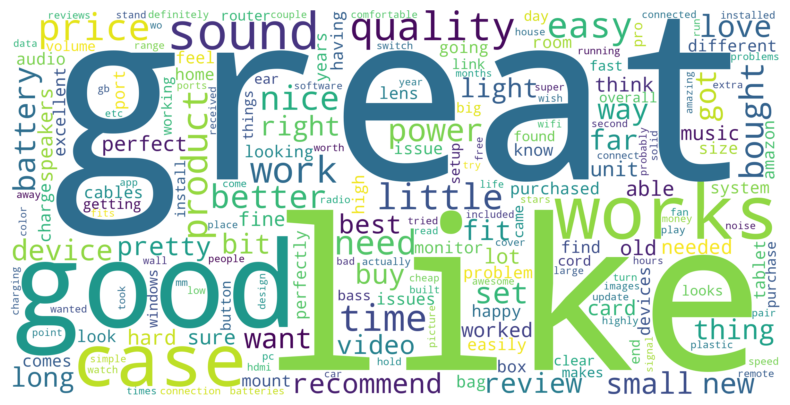

In [27]:
mask = np.array(Image.open("plus.jpg"))

for word in words_to_remove:
    if word in word_freq_good:
        del word_freq_good[word]
wordcloud_good_shape = WordCloud(
    width=2400, height=2400, background_color="white", mask=mask, colormap="viridis"
).generate_from_frequencies(word_freq_good)
wordcloud_good = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_good)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_good, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_good.to_file("plus2_output.png")
wordcloud_good_shape.to_file("plus2_shape_output.png")

In the word cloud of **positive reviews**, positive words like **"good"** and **"great"** have shown a **significant increase** compared to previous states. Furthermore, the word **"great"** is the **most frequently** occurring word in this word cloud, indicating customer **satisfaction** with the products. There are also other words in this word cloud that represent customer satisfaction, such as **"excellent", "perfectly", "recommend", "love", "pretty" and ...**

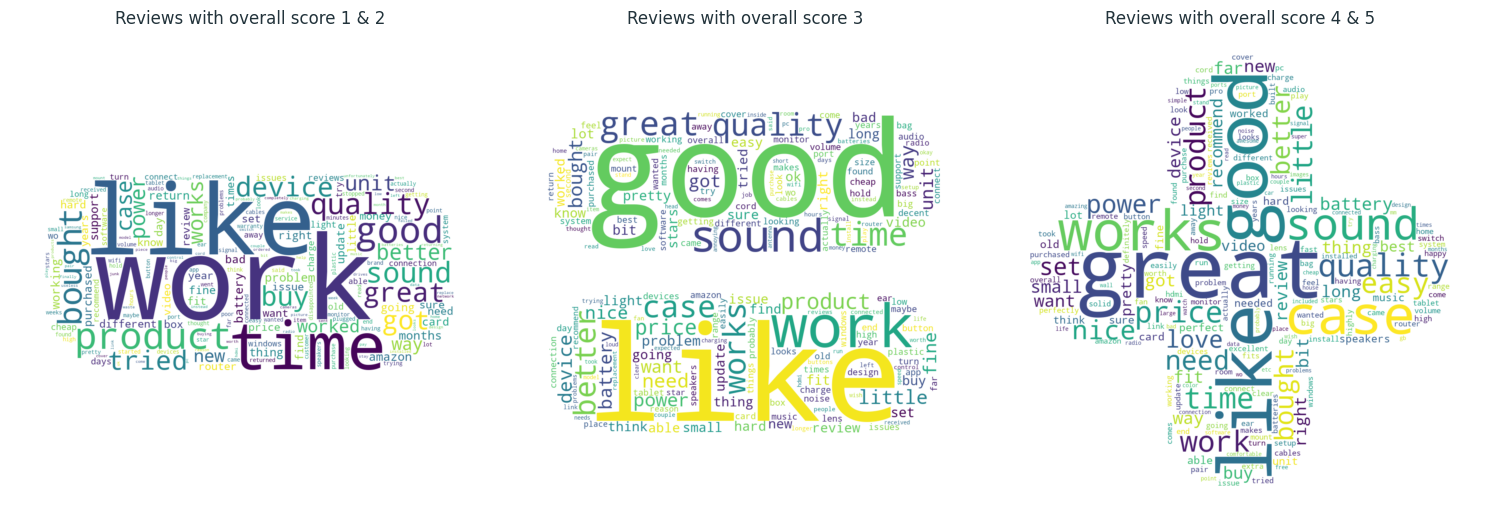

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

axs[0].imshow(wordcloud_bad_shape, interpolation="bilinear")
axs[0].set_title("Reviews with overall score 1 & 2", color="#22333b", fontsize=12)
axs[0].axis("off")

axs[1].imshow(wordcloud_soso_shape, interpolation="bilinear")
axs[1].set_title("Reviews with overall score 3", color="#22333b", fontsize=12)
axs[1].axis("off")

axs[2].imshow(wordcloud_good_shape, interpolation="bilinear")
axs[2].set_title("Reviews with overall score 4 & 5", color="#22333b", fontsize=12)
axs[2].axis("off")

plt.tight_layout()
plt.show()

Here we have all three word clouds side by side.

<h3>Extra. Word Clouds of reviews summary</h6>

<h5>Tokenizing the summaries of reviews and counting the frequency of words</h5>

In [8]:
word_freq_bad_summary = defaultdict(int)

df_bad = data[data["feeling"] == -1]
batch_size = 100
num_batches = len(df_bad) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_bad["summary"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(str(text)) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_bad_summary[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_bad["summary"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]
for tokens in remaining_tokens:
    for token in tokens:
        word_freq_bad_summary[token] += 1

freq_bad_summary = pd.DataFrame(list(word_freq_bad_summary.items()), columns=["Word", "Frequency"])
freq_bad_summary.to_csv("freq_bad_summary.csv")

100%|██████████| 1397/1397 [16:26<00:00,  1.42it/s]


In [22]:
words_to_remove = [
    "use",
    "phone",
    "cable",
    "camera",
    "usb",
    "tv",
    "laptop",
    "speaker",
    "screen",
    "charger",
    "mouse",
    "plug",
    "ipad",
    "adapter",
    "bluetooth",
    "computer",
    "drive",
    "keyboard",
    "wireless",
    "headphones",
    "great",
    "good",
    "quality",
    "work",
    "works",
    "product"
]

<h5>Word Cloud of summaries of reviews with overall rating 1 & 2</h5>

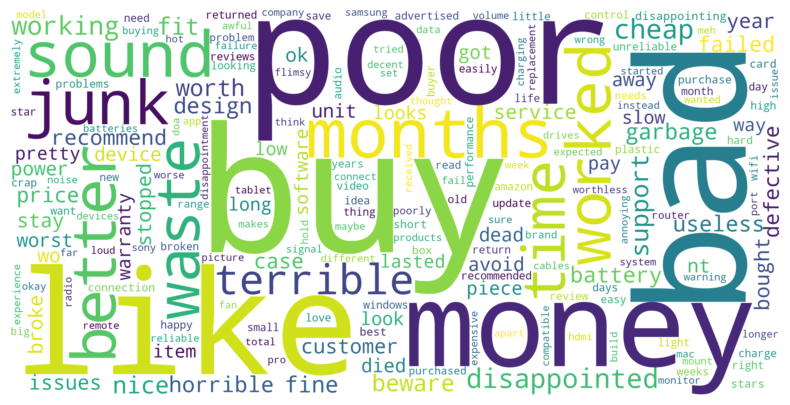

In [27]:
mask = np.array(Image.open("min.jpg"))

for word in words_to_remove:
    if word in word_freq_bad_summary:
        del word_freq_bad_summary[word]
wordcloud_bad_summary_shape = WordCloud(
    width=2400, height=2400, background_color="white", mask=mask, colormap="viridis"
).generate_from_frequencies(word_freq_bad_summary)
wordcloud_bad_summary = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_bad_summary)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bad_summary, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_bad_summary.to_file("min_summary_output.png")
wordcloud_bad_summary_shape.to_file("min_summary_shape_output.png")

In the word cloud of **negative reviews summary**, we can observe a high frequency of negative words such as **"bad", "poor", "junk", "waste" and "terrible"**. Additionally, words like **"garbage", "horrible", "annoying", "worthless" and "disappointment"** are used with lower frequency. The word **"defective"** also has a low repetition, indicating **dissatisfaction** of some customers with **not receiving all the items they ordered**.<br> Another interesting point is that the only frequently mentioned brand in these summaries is **Samsung**.

<h5>Tokenizing the summaries of reviews and counting the frequency of words</h5>

In [12]:
word_freq_soso_summary = defaultdict(int)

df_soso = data[data["feeling"] == 0]
batch_size = 100
num_batches = len(df_soso) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_soso["summary"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(str(text)) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_soso_summary[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_soso["summary"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]
for tokens in remaining_tokens:
    for token in tokens:
        word_freq_soso_summary[token] += 1

freq_soso_summary = pd.DataFrame(list(word_freq_soso_summary.items()), columns=["Word", "Frequency"])
freq_soso_summary.to_csv("freq_soso_summary.csv")

100%|██████████| 812/812 [10:52<00:00,  1.24it/s]


<h5>Word Cloud of summaries of reviews with overall rating 3</h5>

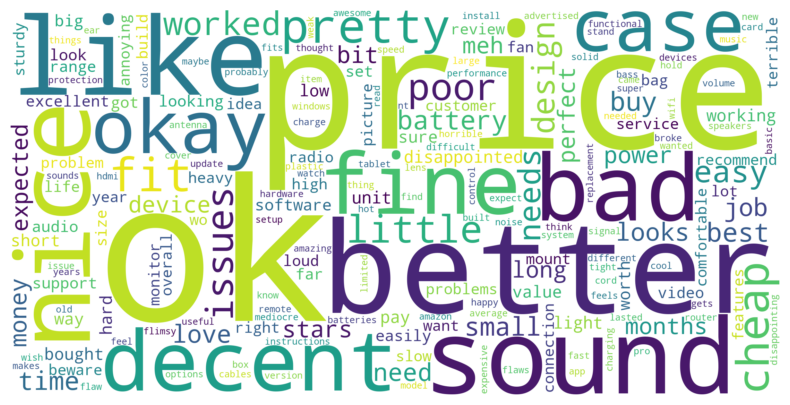

In [28]:
mask = np.array(Image.open("equal.jpg"))

for word in words_to_remove:
    if word in word_freq_soso_summary:
        del word_freq_soso_summary[word]
wordcloud_soso_summary_shape = WordCloud(
    width=2400, height=2400, background_color="white", mask=mask, colormap="viridis"
).generate_from_frequencies(word_freq_soso_summary)
wordcloud_soso_summary = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_soso_summary)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_soso_summary, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_soso_summary.to_file("equal_summary_output.png")
wordcloud_soso_summary_shape.to_file("equal_summary_shape_output.png")

In the word cloud of **neutral reviews summary**, there is a higher frequency of positive words compared to negative words. Words like **"nice", "fine", and "ok"** are more frequently used. However, the word **"bad"** also has a high repetition.<br> The word "**sound"** is as expected, highly repeated, and can be **associated with both positive and negative contexts**, indicating a **middle level of satisfaction or dissatisfaction** in these reviews summary. The word **"better"** is also frequently mentioned, indicating **lack of complete satisfaction** from customers.<br> The word **"cheap"** is somewhat repeated, suggesting that **affordability may contribute to moderate satisfaction** among customers.

<h5>Tokenizing the summaries of reviews and counting the frequency of words</h5>

In [14]:
word_freq_good_summary = defaultdict(int)

df_good = data[data["feeling"] == 1]
batch_size = 100
num_batches = len(df_good) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_good["summary"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(str(text)) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_good_summary[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_good["summary"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]
for tokens in remaining_tokens:
    for token in tokens:
        word_freq_good_summary[token] += 1

freq_good_summary = pd.DataFrame(list(word_freq_good_summary.items()), columns=["Word", "Frequency"])
freq_good_summary.to_csv("freq_good_summary.csv")

100%|██████████| 6179/6179 [1:20:05<00:00,  1.29it/s]


<h5>Word Cloud of summaries of reviews with overall rating 4 & 5</h5>

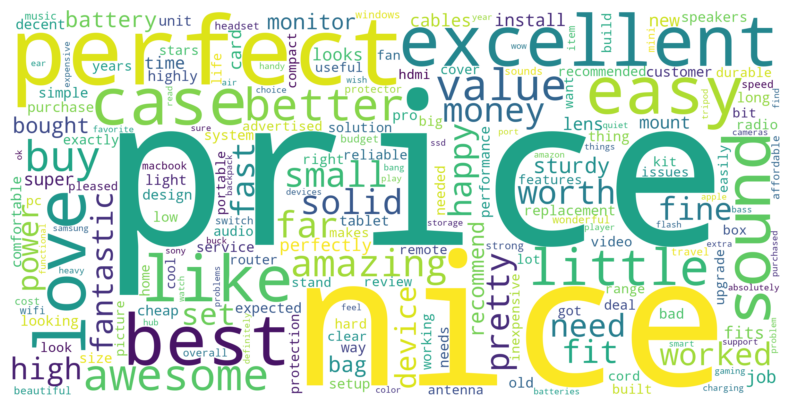

In [29]:
mask = np.array(Image.open("plus.jpg"))

for word in words_to_remove:
    if word in word_freq_good_summary:
        del word_freq_good_summary[word]
wordcloud_good_summary_shape = WordCloud(
    width=2400, height=2400, background_color="white", mask=mask, colormap="viridis"
).generate_from_frequencies(word_freq_good_summary)
wordcloud_good_summary = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_good_summary)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_good_summary, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_good_summary.to_file("plus_summary_output.png")
wordcloud_good_summary_shape.to_file("plus_summary_shape_output.png")

In the **positive reviews's summary**, there is a noticeable presence of **positive words** such as **"nice", "perfect", "excellent", "best", "awesome", "fantastic", "love", "amazing", "happy" and ...** indicating customer **satisfaction** with the products.<br>An important point is that the **most frequently mentioned word here is "price"** Therefore, we can conclude that the **price factor** is** highly significant in the opinions of customers**.

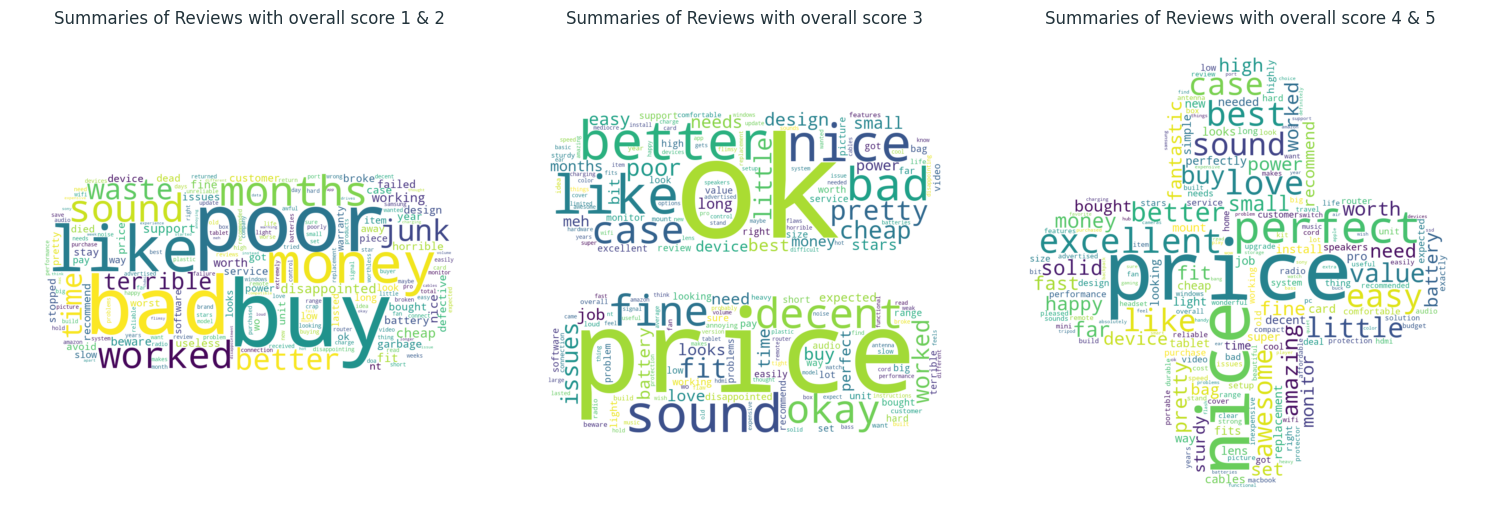

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

axs[0].imshow(wordcloud_bad_summary_shape, interpolation="bilinear")
axs[0].set_title("Summaries of Reviews with overall score 1 & 2", color="#22333b", fontsize=12)
axs[0].axis("off")

axs[1].imshow(wordcloud_soso_summary_shape, interpolation="bilinear")
axs[1].set_title("Summaries of Reviews with overall score 3", color="#22333b", fontsize=12)
axs[1].axis("off")

axs[2].imshow(wordcloud_good_summary_shape, interpolation="bilinear")
axs[2].set_title("Summaries of Reviews with overall score 4 & 5", color="#22333b", fontsize=12)
axs[2].axis("off")

plt.tight_layout()
plt.show()

Here we have all three word clouds side by side.<br>
The difference we have here compared to the previous state(the word clouds of reviews), is that the categories are significantly distinct from each other, and the **differences are clearly visible**.<br> From this, we can conclude that **customers express their opinions more explicitly in the summary of reviews**.

<h3>3. Top 10 person who had the most useful reviews</h3>

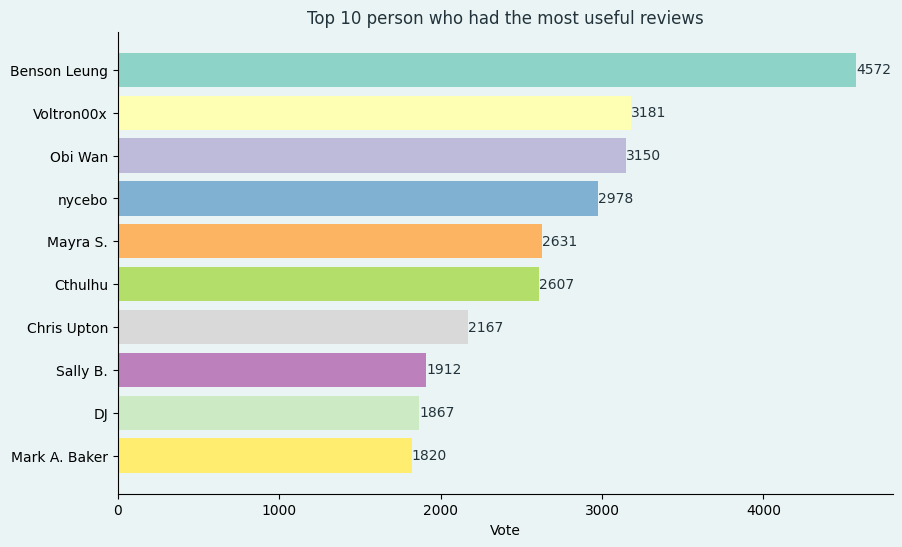

In [123]:
df = data.dropna(subset=["vote"])
df["vote"] = (
    df["vote"]
    .apply(lambda x: float(x.replace(",", "")) if isinstance(x, str) else x)
    .astype(int)
)
vote_sum = df.groupby("reviewerID")["vote"].sum()
vote_sum = vote_sum.sort_values(ascending=False).head(10)
result = pd.merge(
    vote_sum,
    df[["reviewerID", "reviewerName"]].drop_duplicates(),
    on="reviewerID",
    how="left",
)
result["reviewerName"].unique()


fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(result)))

bars = ax.barh(result["reviewerName"], result["vote"], color=colors)
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width}",
        ha="left",
        va="center",
        color="#22333b",
    )

ax.set_title(
    "Top 10 person who had the most useful reviews", color="#22333b", fontsize=12
)
ax.set_xlabel("Vote")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.invert_yaxis()

<h3>4. Review Text Length Distribution</h3>

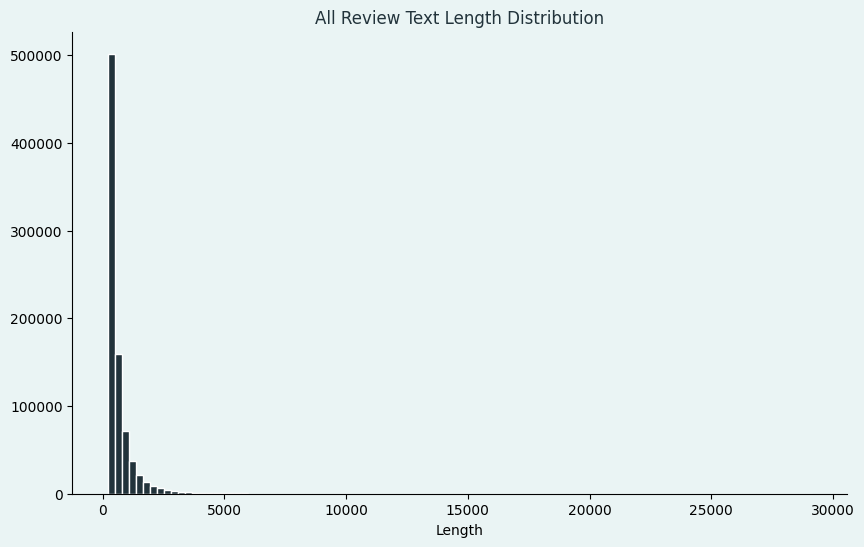

In [121]:
review_lengths = data["reviewText"].apply(len)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(review_lengths, bins=100, edgecolor="w", color="#22333b")
ax.set_title("All Review Text Length Distribution", color="#22333b", fontsize=12)
ax.set_xlabel("Length")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

As observed, our dataset contains outliers. The reviews with a length of approximately more than 3000 have occurred very rarely.

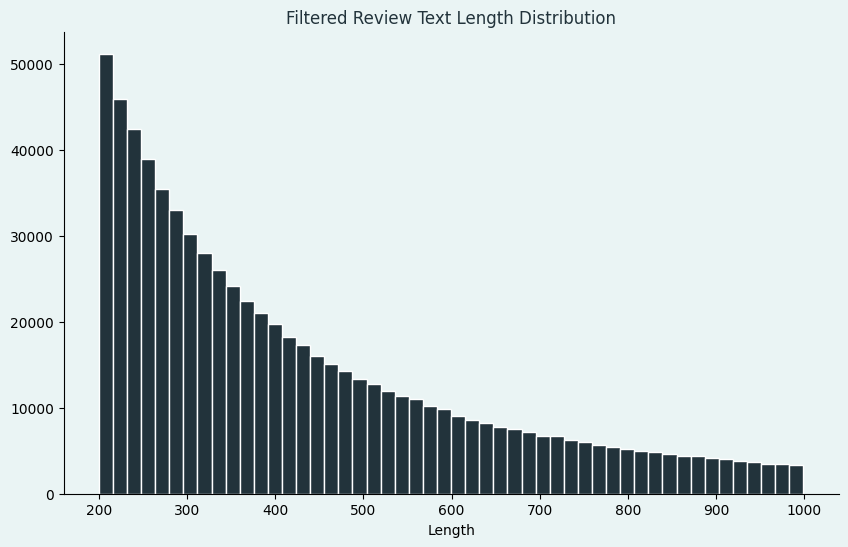

In [120]:
review_lengths = review_lengths[review_lengths < 1000]

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(review_lengths, bins=50, edgecolor="w", color="#22333b")
ax.set_title("Filtered Review Text Length Distribution", color="#22333b", fontsize=12)
ax.set_xlabel("Length")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

Here, we have plotted the distribution of reviews with a length of less than 1000, and as observed, there is a sufficient number of data in each category. The selection of the maximum reviews length for modeling is done in the modeling section.

<h3>5. Top 10 products that have achieved the highest number of overall ratings of 5.</h3>

In [57]:
top10_product = (
    data[data["overall"] == 5]
    .groupby("asin")["overall"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

result = pd.merge(top10_product, extra.drop_duplicates(), on="asin", how="left")
result = result.rename(columns={"overall": "count of 5 overall"})
result = result[["title", "brand", "count of 5 overall"]]

pd.set_option("max_colwidth", 200)
result.head(10)

title  \
0                        OontZ Angle 3 Enhanced Stereo Edition IPX5 Splashproof Portable Bluetooth Speaker with Volume Booster AMP 10 Watts Power, Custom Bass Radiator, 100' Wireless Range Bluetooth 4.2   
1                                                                                                                                                                NETGEAR N300 WiFi Range Extender (EX2700)   
2                                                                                                                              Roku Streaming Stick (3600R) - HD Streaming Player with Quad-Core Processor   
3                                                                                                                                                       StarTech USB 2.0 to SATA IDE Adapter (USB2SATAIDE)   
4              Logitech M570 Wireless Trackball Mouse &ndash; Ergonomic Design with Sculpted Right-hand Shape, Compatible with Apple Mac and Microsoft Windows Computers, USB Unifying Receiver, Dark Gray   
5                                                                                                                                     Samsung 850 EVO 500GB 2.5-Inch SATA III Internal SSD (MZ-75E500B/AM)   
6  ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up to 3167 Mbps) with MU-MIMO to ensure Lag-Free Gaming, AiProtection network security powered by Trend Micro, Adaptive QoS and Parental Control (RT-AC3...   
7  VideoSecu ML531BE TV Wall Mount for Most 27&quot;-55&quot; LED LCD Plasma Flat Screen Monitor up to 88 lb VESA 400x400 with Full Motion Swivel Articulating 20 in Extension Arm, HDMI Cable &amp; Bu...   
8                                                                                                               Arlo - Wireless Home Security Camera System | Indoor/Outdoor | 2 camera kit (Discontinued)   
9                                                                                                                                     Samsung 850 EVO 250GB 2.5-Inch SATA III Internal SSD (MZ-75E250B/AM)   

                    brand  count of 5 overall  
0    Cambridge Soundworks                1163  
1                 NETGEAR                 659  
2                    Roku                 600  
3                StarTech                 598  
4                Logitech                 552  
5                 Samsung                 529  
6                    Asus                 471  
7               VideoSecu                 448  
8  Arlo Technologies, Inc                 433  
9                 Samsung                 431

<h3>6. Top 10 brands that had the highest number of reviews and the highest average overall rating.</h3>

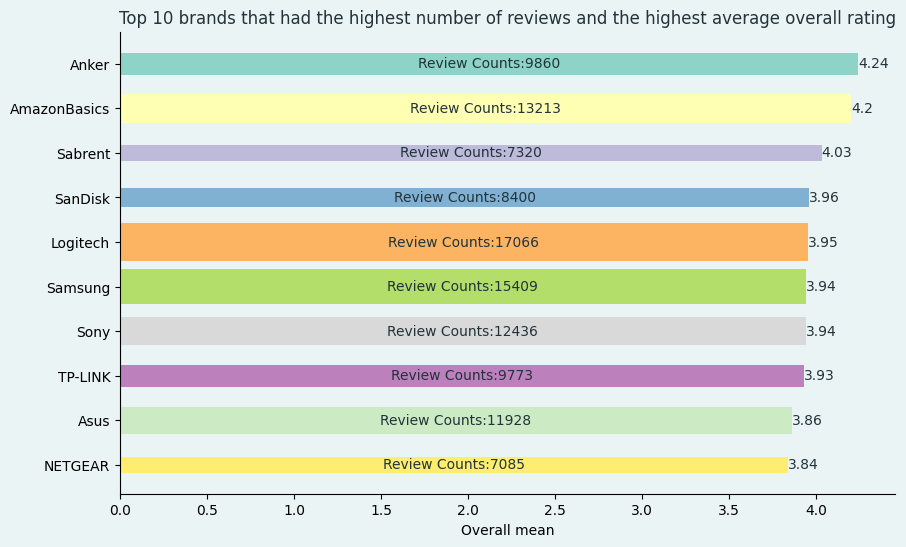

In [4]:
df = pd.merge(
    data[["asin", "overall"]], extra[["asin", "brand"]], on="asin", how="left"
)
result = (
    df.groupby("brand")
    .agg({"asin": "count", "overall": "mean"})
    .sort_values(by="asin", ascending=False)
    .head(10)
)
result = result.sort_values(by="overall", ascending=False).head(10).reset_index()
result["overall"] = result["overall"].round(2)
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(result)))

bars = ax.barh(
    result["brand"],
    width=result["overall"],
    height=(result["asin"] / 20000),
    color=colors,
)
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width}",
        color="#22333b",
        ha="left",
        va="center",
    )
    ax.text(
        width / 2,
        bar.get_y() + bar.get_height() / 2,
        f"Review Counts:{ int(bar.get_height()*20000)}",
        color="#22333b",
        ha="center",
        va="center",
    )


ax.set_title(
    "Top 10 brands that had the highest number of reviews and the highest average overall rating",
    color="#22333b",
    fontsize=12,
)
ax.set_xlabel("Overall mean")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.invert_yaxis()

<h3>Extra. Top 10 person who had the most not verified reviews</h3>

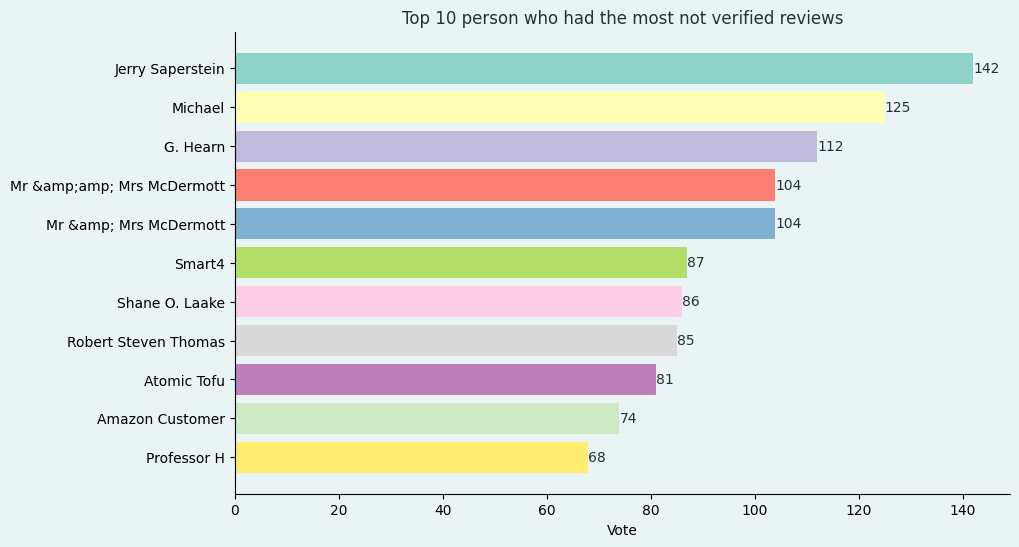

In [44]:
not_verified_count = data[data["verified"] == False].groupby("reviewerID")["verified"].count()
not_verified_count = not_verified_count.sort_values(ascending=False).head(10)
result = pd.merge(
    not_verified_count,
    data[["reviewerID", "reviewerName"]].drop_duplicates(),
    on="reviewerID",
    how="left",
)

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(result)))

bars = ax.barh(result["reviewerName"], result["verified"], color=colors)
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width}",
        ha="left",
        va="center",
        color="#22333b",
    )

ax.set_title(
    "Top 10 person who had the most not verified reviews", color="#22333b", fontsize=12
)
ax.set_xlabel("Vote")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.invert_yaxis()

Let's examine the word clouds of comments from two individuals to see why their comments were not approved.

100%|██████████| 1/1 [00:03<00:00,  3.79s/it]


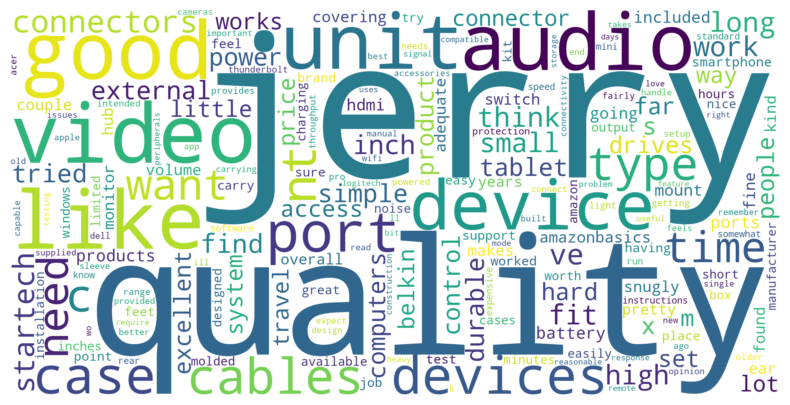

In [28]:
word_freq_jerry = defaultdict(int)

df_jerry = data[(data["reviewerName"] == "Jerry Saperstein") & (data['verified'] == False)]
batch_size = 100
num_batches = len(df_jerry) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_jerry["reviewText"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(text) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_jerry[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_jerry["reviewText"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]
for tokens in remaining_tokens:
    for token in tokens:
        word_freq_jerry[token] += 1

freq_jerry = pd.DataFrame(list(word_freq_jerry.items()), columns=["Word", "Frequency"])
freq_jerry.to_csv("freq_jerry.csv")

for word in words_to_remove:
    if word in word_freq_jerry:
        del word_freq_jerry[word]

wordcloud_jerry = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_jerry)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_jerry, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_jerry.to_file("jerry_output.png")

The word clouds of reviews from this individual did not include any unusual words. However, an important point is that the **most frequently mentioned word** in his reviews was **his own name**.<br> Additionally, single letters like **N, T, X, M and S** and two-letter words like **"ve" and "wo"** are observed. These letters and words indicate that this individual **may have made mistakes in writing his reviews, which is why his reviews were not approved.**

0it [00:00, ?it/s]


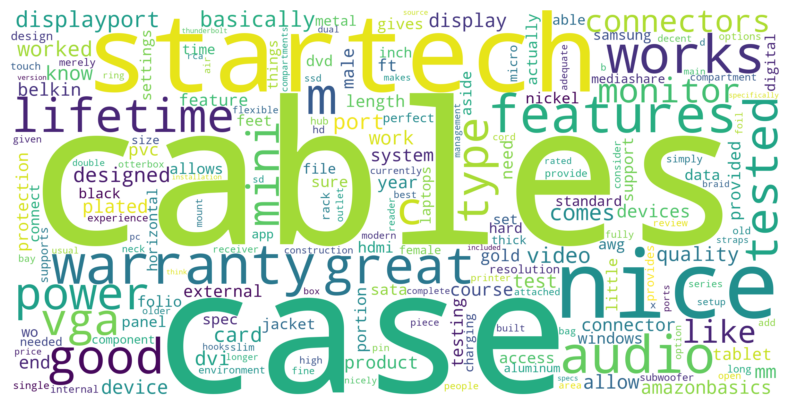

In [33]:
word_freq_Tofu = defaultdict(int)

df_Tofu = data[(data["reviewerName"] == "Atomic Tofu") & (data['verified'] == False)]
batch_size = 100
num_batches = len(df_Tofu) // batch_size

for i in tqdm(range(num_batches)):
    batch_texts = df_Tofu["reviewText"][i * batch_size : (i + 1) * batch_size]
    batch_tokens = [process_text(text) for text in batch_texts]

    for tokens in batch_tokens:
        for token in tokens:
            word_freq_Tofu[token] += 1

# Process the remaining texts (if any) that didn't fit into a full batch
remaining_texts = df_Tofu["reviewText"][num_batches * batch_size :]
remaining_tokens = [process_text(text) for text in remaining_texts]
for tokens in remaining_tokens:
    for token in tokens:
        word_freq_Tofu[token] += 1

freq_Tofu = pd.DataFrame(list(word_freq_jerry.items()), columns=["Word", "Frequency"])
freq_Tofu.to_csv("freq_jerry.csv")


for word in words_to_remove:
    if word in word_freq_Tofu:
        del word_freq_Tofu[word]

wordcloud_Tofu = WordCloud(
    width=2400, height=1200, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq_Tofu)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_Tofu, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_Tofu.to_file("jerry_output.png")

In the word cloud of the second individual's reviews, no unusual words were used as well. However, one notable inclusion among the most frequently mentioned words was the brand **"StarTech"** indicating that this person is either a **strong supporter** of this brand or has a **strong dislike** for it.<br> Similar to the previous case, single letters like **M and X** were among the repeated words. Therefore, this person also confirms the previous conclusion that **their reviews were not approved likely due to spelling mistakes or errors in their writing.**


<h3>Extra. Positive, Neutral and Negative Reviews Length box plot</h3>

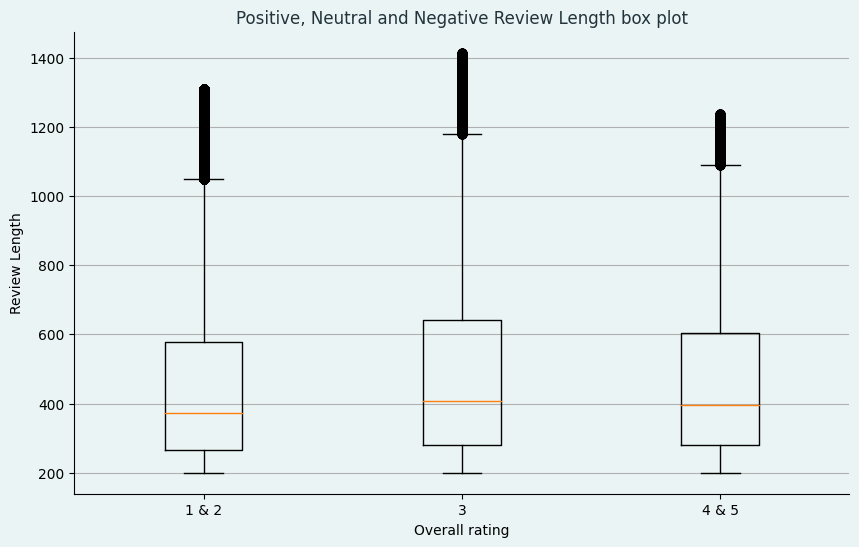

In [5]:
def remove_outliers(arr, threshold=1):
    mean = np.mean(arr)
    std = np.std(arr)
    filtered_arr = [x for x in arr if (mean - threshold * std < x < mean + threshold * std)]
    return filtered_arr

good_reviews = data[data['overall'].isin([4, 5])]
soso_reviews = data[data['overall'].isin([3])]
bad_reviews = data[data['overall'].isin([1, 2])]

good_reviews_length = remove_outliers(good_reviews['reviewText'].apply(len))
soso_reviews_length = remove_outliers(soso_reviews['reviewText'].apply(len))
bad_reviews_length = remove_outliers(bad_reviews['reviewText'].apply(len))

fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot([good_reviews_length, soso_reviews_length, bad_reviews_length], labels=['1 & 2', '3', '4 & 5'])

ax.set_title(
    "Positive, Neutral and Negative Review Length box plot", color="#22333b", fontsize=12
)
ax.set_xlabel("Overall rating")
ax.set_ylabel("Review Length")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.yaxis.grid(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

As we can observe, neutral comments generally have a **slightly longer length**. Therefore, we can say that when people are **either satisfied or dissatisfied** with something, they **express their opinions in a shorter manner** compared to a state where they have **neither complete satisfaction nor complete dissatisfaction**.


<h3>Extra. Top 10 Colors that had the highest number of reviews and the highest average overall rating.</h3>

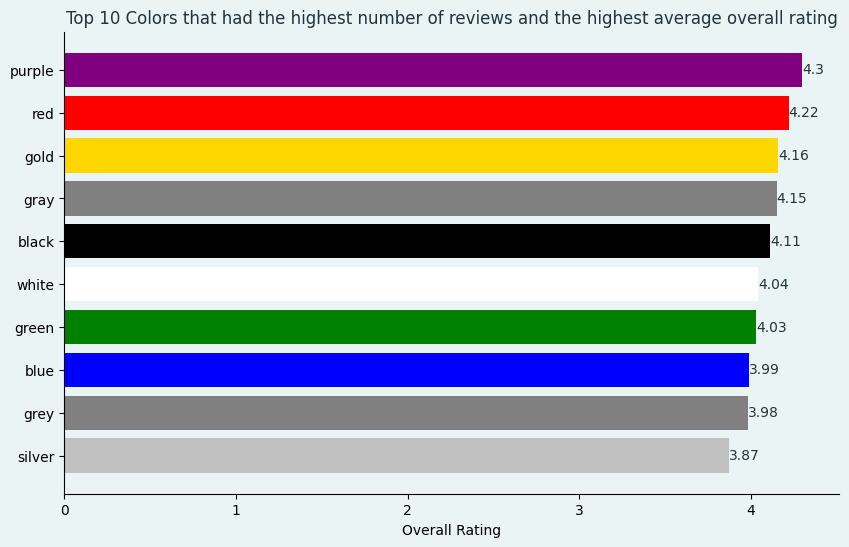

In [6]:
import ast

df = data.dropna(subset="style")
df["style"] = df["style"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else None
)
df["color"] = df["style"].apply(
    lambda x: x.get("Color:") if isinstance(x, dict) and "Color:" in x else None
)

color_counts = df["color"].str.lower().value_counts().reset_index()
color_counts.columns = ["color", "count"]
sorted_colors = color_counts.sort_values(by="count", ascending=False).head(10)

mean_ratings = (
    sorted_colors.merge(df, how="left", on="color")
    .groupby("color")["overall"]
    .mean()
    .reset_index()
)
sorted_mean_ratings = mean_ratings.sort_values(by="overall", ascending=False)

colors = sorted_mean_ratings["color"].str.strip()
mean_overall_ratings = sorted_mean_ratings["overall"].round(2)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(colors, mean_overall_ratings, color=colors)
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width}",
        ha="left",
        va="center",
        color="#22333b",
    )

ax.set_title("Top 10 Colors that had the highest number of reviews and the highest average overall rating", color="#22333b", fontsize=12)
ax.set_xlabel("Overall Rating")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.invert_yaxis()